In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

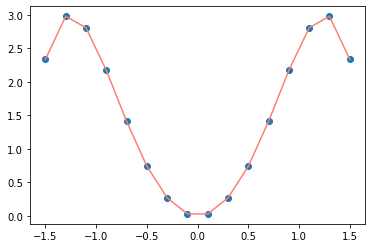

In [2]:
# Creamos los datos

samples = 100
size = 1.5
step = 0.2
xs = []
ys = []
     
def f(x):
    return 3 * np.sin(x ** 2) 

xs = np.arange(-size, size + step, step)
ys = list(map(f,xs))

plt.plot(xs,ys, color = "salmon")
plt.scatter(xs,ys)

In [4]:
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)
def circuit(theta0, x):
    qml.RY(theta0 * x, wires = 0)
    return qml.expval(qml.PauliZ(wires = 0))

def q_model(theta0, theta1, theta2, x):
    return circuit(theta0, x) * theta1 + theta2

def q_error(theta0, theta1, theta2):
    er = 0
    for x, y in zip(xs, ys):
        er += (q_model(theta0, theta1, theta2, x) - y) ** 2
    return np.sqrt(er) / len(xs)

In [7]:
theta0, theta1, theta2 = np.random.rand(3) * np.pi
gradient_fn_theta = qml.grad(q_error, argnum = [0,1,2])

lr = 0.9

for epoch in range(101):
    gradiente = gradient_fn_theta(theta0, theta1, theta2)
    theta0 = theta0 - lr*gradiente[0] 
    theta1 = theta1 - lr*gradiente[1] 
    theta2 = theta2 - lr*gradiente[2] 
    if epoch % 5 == 0:
        print("epoch", epoch, "loss", q_error(theta0, theta1, theta2))



epoch 0 loss 0.5668373219070832
epoch 5 loss 0.3959852801343963
epoch 10 loss 0.3014546321529661
epoch 15 loss 0.27783623708162414
epoch 20 loss 0.2708369979379825
epoch 25 loss 0.2655989008139764
epoch 30 loss 0.2580382882554449
epoch 35 loss 0.2412833991874777
epoch 40 loss 0.19768508478977406
epoch 45 loss 0.12129681635824578
epoch 50 loss 0.08163347657483366
epoch 55 loss 0.05487713311197129
epoch 60 loss 0.03518128832538199
epoch 65 loss 0.03504937615801752
epoch 70 loss 0.035049356725474407
epoch 75 loss 0.035049356720031344
epoch 80 loss 0.03504935671904081
epoch 85 loss 0.03504935671869616
epoch 90 loss 0.03504935671857619
epoch 95 loss 0.035049356718534444
epoch 100 loss 0.035049356718519935


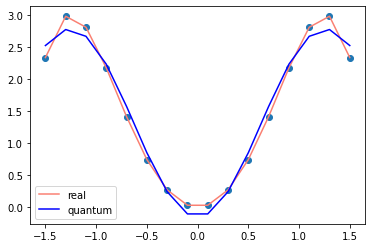

In [8]:
def q_solution(x):
    return circuit(theta0, x) * theta1 + theta2

ys2 = list(map(q_solution, xs))

plt.plot(xs,ys, color = "salmon", label = "real")
plt.plot(xs, ys2, "blue", label = "quantum")
plt.scatter(xs,ys)
plt.legend()